In [2]:
import torch
from torch import atan
from torch.autograd import grad
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.misc import derivative

from sympy import *
import sympy as sp
from scipy.special import roots_legendre
from Func import *


In [25]:

xjm1, xj, xjp1 = sympy.symbols(['x_{j-1}', 'x_{j}', 'x_{j+1}'])
x, h, eps = sympy.symbols(['x', 'h', '\epsilon'])
rho = lambda x: sympy.sin(sympy.pi * x)
rho_ = f(x, 0.5, 0.8)

A = - sympy.integrate(rho(x) * (x - xjm1)/h, (x, xjm1, xj))
B = - sympy.integrate(rho(x) * (xjp1 - x)/h, (x, xj, xjp1))

result = sympy.simplify(A + B)
print(Add(result))
# rho_func = lambdify(rho, x)
print(type(Add(result)))
print(type(rho_))


(pi*(-x_{j+1} + x_{j})*cos(pi*x_{j}) + pi*(-x_{j-1} + x_{j})*cos(pi*x_{j}) + sin(pi*x_{j+1}) + sin(pi*x_{j-1}) - 2*sin(pi*x_{j}))/(pi**2*h)
<class 'sympy.core.mul.Mul'>
<class 'sympy.core.mul.Mul'>


(1 - x)*(atan(0.5*x - 0.4) + 0.380506377112365)
(1 - x)*(atan(50*x - 40.0) + 1.54580153317598)
0.5*(1 - x)/(0.25*(x - 0.8)**2 + 1) - atan(0.5*x - 0.4) - 0.380506377112365
0.43103448275862055
50*(1 - x)/(2500*(x - 0.8)**2 + 1) - atan(50*x - 40.0) - 1.54580153317598
0.03123048094940306


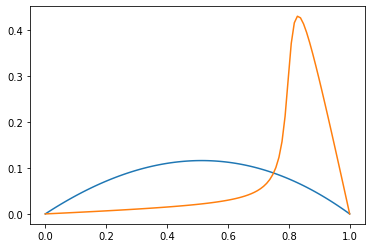

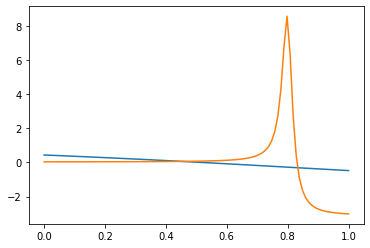

In [4]:
def f(x, a, xb=0.8):
    return (1 - x) * (sp.atan(a * (x - xb)) + sp.atan(a*xb))
def d2f(x, a, xb=0.8):
    b = x-xb
    return -2*(a+a**3*b*(b-x+1))/(a**2*b**2+1)*2

x = symbols('x')
x_data = np.linspace(0, 1, 100)
a = [0.5, 50]
xb = 0.8

for i in a:
    f_ = f(x, i)
    f_func = lambdify(x, f_)
    print(f_)
    #plt.figure()
    plt.plot(x_data, f_func(x_data))

plt.figure()
for i in a:
    df_ = diff(f(x, i), x)
    df_func = lambdify(x, df_)
    print(df_)

    plt.plot(x_data, df_func(x_data))
    print(df_func(0))

